In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from df_utils import * 

In [2]:
dt_variation = ['LYAttenuation',
                'LYDown',
                'LYRayleigh',
                'Recomb',
                'SCE',
                'WireModdEdX',
                'WireModThetaXZ',
                'WireModThetaYZ_withouts',
                'WireModX',
                'WireModYZ']


# Path to where you want to store your plots 
figure_path = '/home/lmlepin/Desktop/Plots_DT_Drive/2023/det_var/'


# Select a run
run = "run3"

# Path to files: 
base_dir = '/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/' + run + '_det_vars/'

In [3]:
df_list = []
df_cv = pd.read_csv(base_dir + run + "_CV_score.csv")
df_cv = make_unique_ev_id(df_cv)
#df_cv = Edit_Weight_Tune(df_cv)
#MC_weight_branch(df_cv)
#df_cv = filter_df(df_cv)
df_list.append(df_cv)
df_cv.head()

,run_number,subrun_number,event_number,ppfx_cv,weightSplineTimesTune,sss_candidate_min_dist,reco_shower_energy_max,reco_shower_nuscore,reco_shower_trackscore,reco_shower_theta_yz,reco_shower_phi_yx,reco_shower_opening_angle,cos_theta,bdt_score,rse_id
0,17219.0,75.0,3766.0,1.034,1.0,49.896,411.682,0.141,0.028,-0.560,-0.373,0.083,0.528,0.020,17219.0_75.0_3766.0
1,15689.0,138.0,6909.0,0.857,1.1,-99999.000,97.481,0.427,0.276,-1.054,-1.509,0.220,0.401,0.009,15689.0_138.0_6909.0
2,17681.0,35.0,1800.0,0.529,1.0,7.855,184.514,0.335,0.078,0.230,2.973,0.246,0.529,0.008,17681.0_35.0_1800.0
3,17488.0,192.0,9612.0,0.947,1.0,-99999.000,575.201,0.966,0.027,-0.019,-0.101,0.187,0.987,0.672,17488.0_192.0_9612.0
4,18008.0,57.0,2867.0,0.965,1.0,0.058,381.175,0.000,0.271,0.467,0.867,0.269,0.900,0.179,18008.0_57.0_2867.0


In [4]:

for var in dt_variation:
    file_name = base_dir + run + "_"+ var +"_score.csv"
    print("Opening file: " + file_name)
    df = pd.read_csv(file_name)
    df = make_unique_ev_id(df)
    #df = Edit_Weight_Tune(df)
    #MC_weight_branch(df)
    #df = filter_df(df)
    df_list.append(df)
    #dataL= data.to_numpy()
    #names['bdt_' + str(var)] = dataL
    #names['weight_' + str(var)] = w


Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run3_det_vars/run3_LYAttenuation_score.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run3_det_vars/run3_LYDown_score.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run3_det_vars/run3_LYRayleigh_score.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run3_det_vars/run3_Recomb_score.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run3_det_vars/run3_SCE_score.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run3_det_vars/run3_WireModdEdX_score.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run3_det_vars/run3_WireModThetaXZ_score.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run3_det_vars/run3_WireModThetaYZ_withouts_score.csv
Opening file: /home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/run3_det_vars/run3_WireModX_score.csv
Opening file: /home/lmlepin/Deskt

In [5]:
#common_list = make_common_evs_df(df_list)

In [6]:
#for i in range(len(df_list)):
#     df_list[i] = df_list[i].loc[(df_list[i]['rse_id'].isin(common_list['rse_id']))]

In [7]:
# General plot settings:

if(run == "run1"):
    nbins = 10
    plot_title = r'Run 1 $\nu$ background detector variations'
    percentage_pos = -5
    x_edge = 5
else:
    nbins = 9
    plot_title = r'Run 3 $\nu$ background detector variations'
    percentage_pos = -6.5 
    x_edge = 4

/home/lmlepin/anaconda3/envs/dark_trident/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


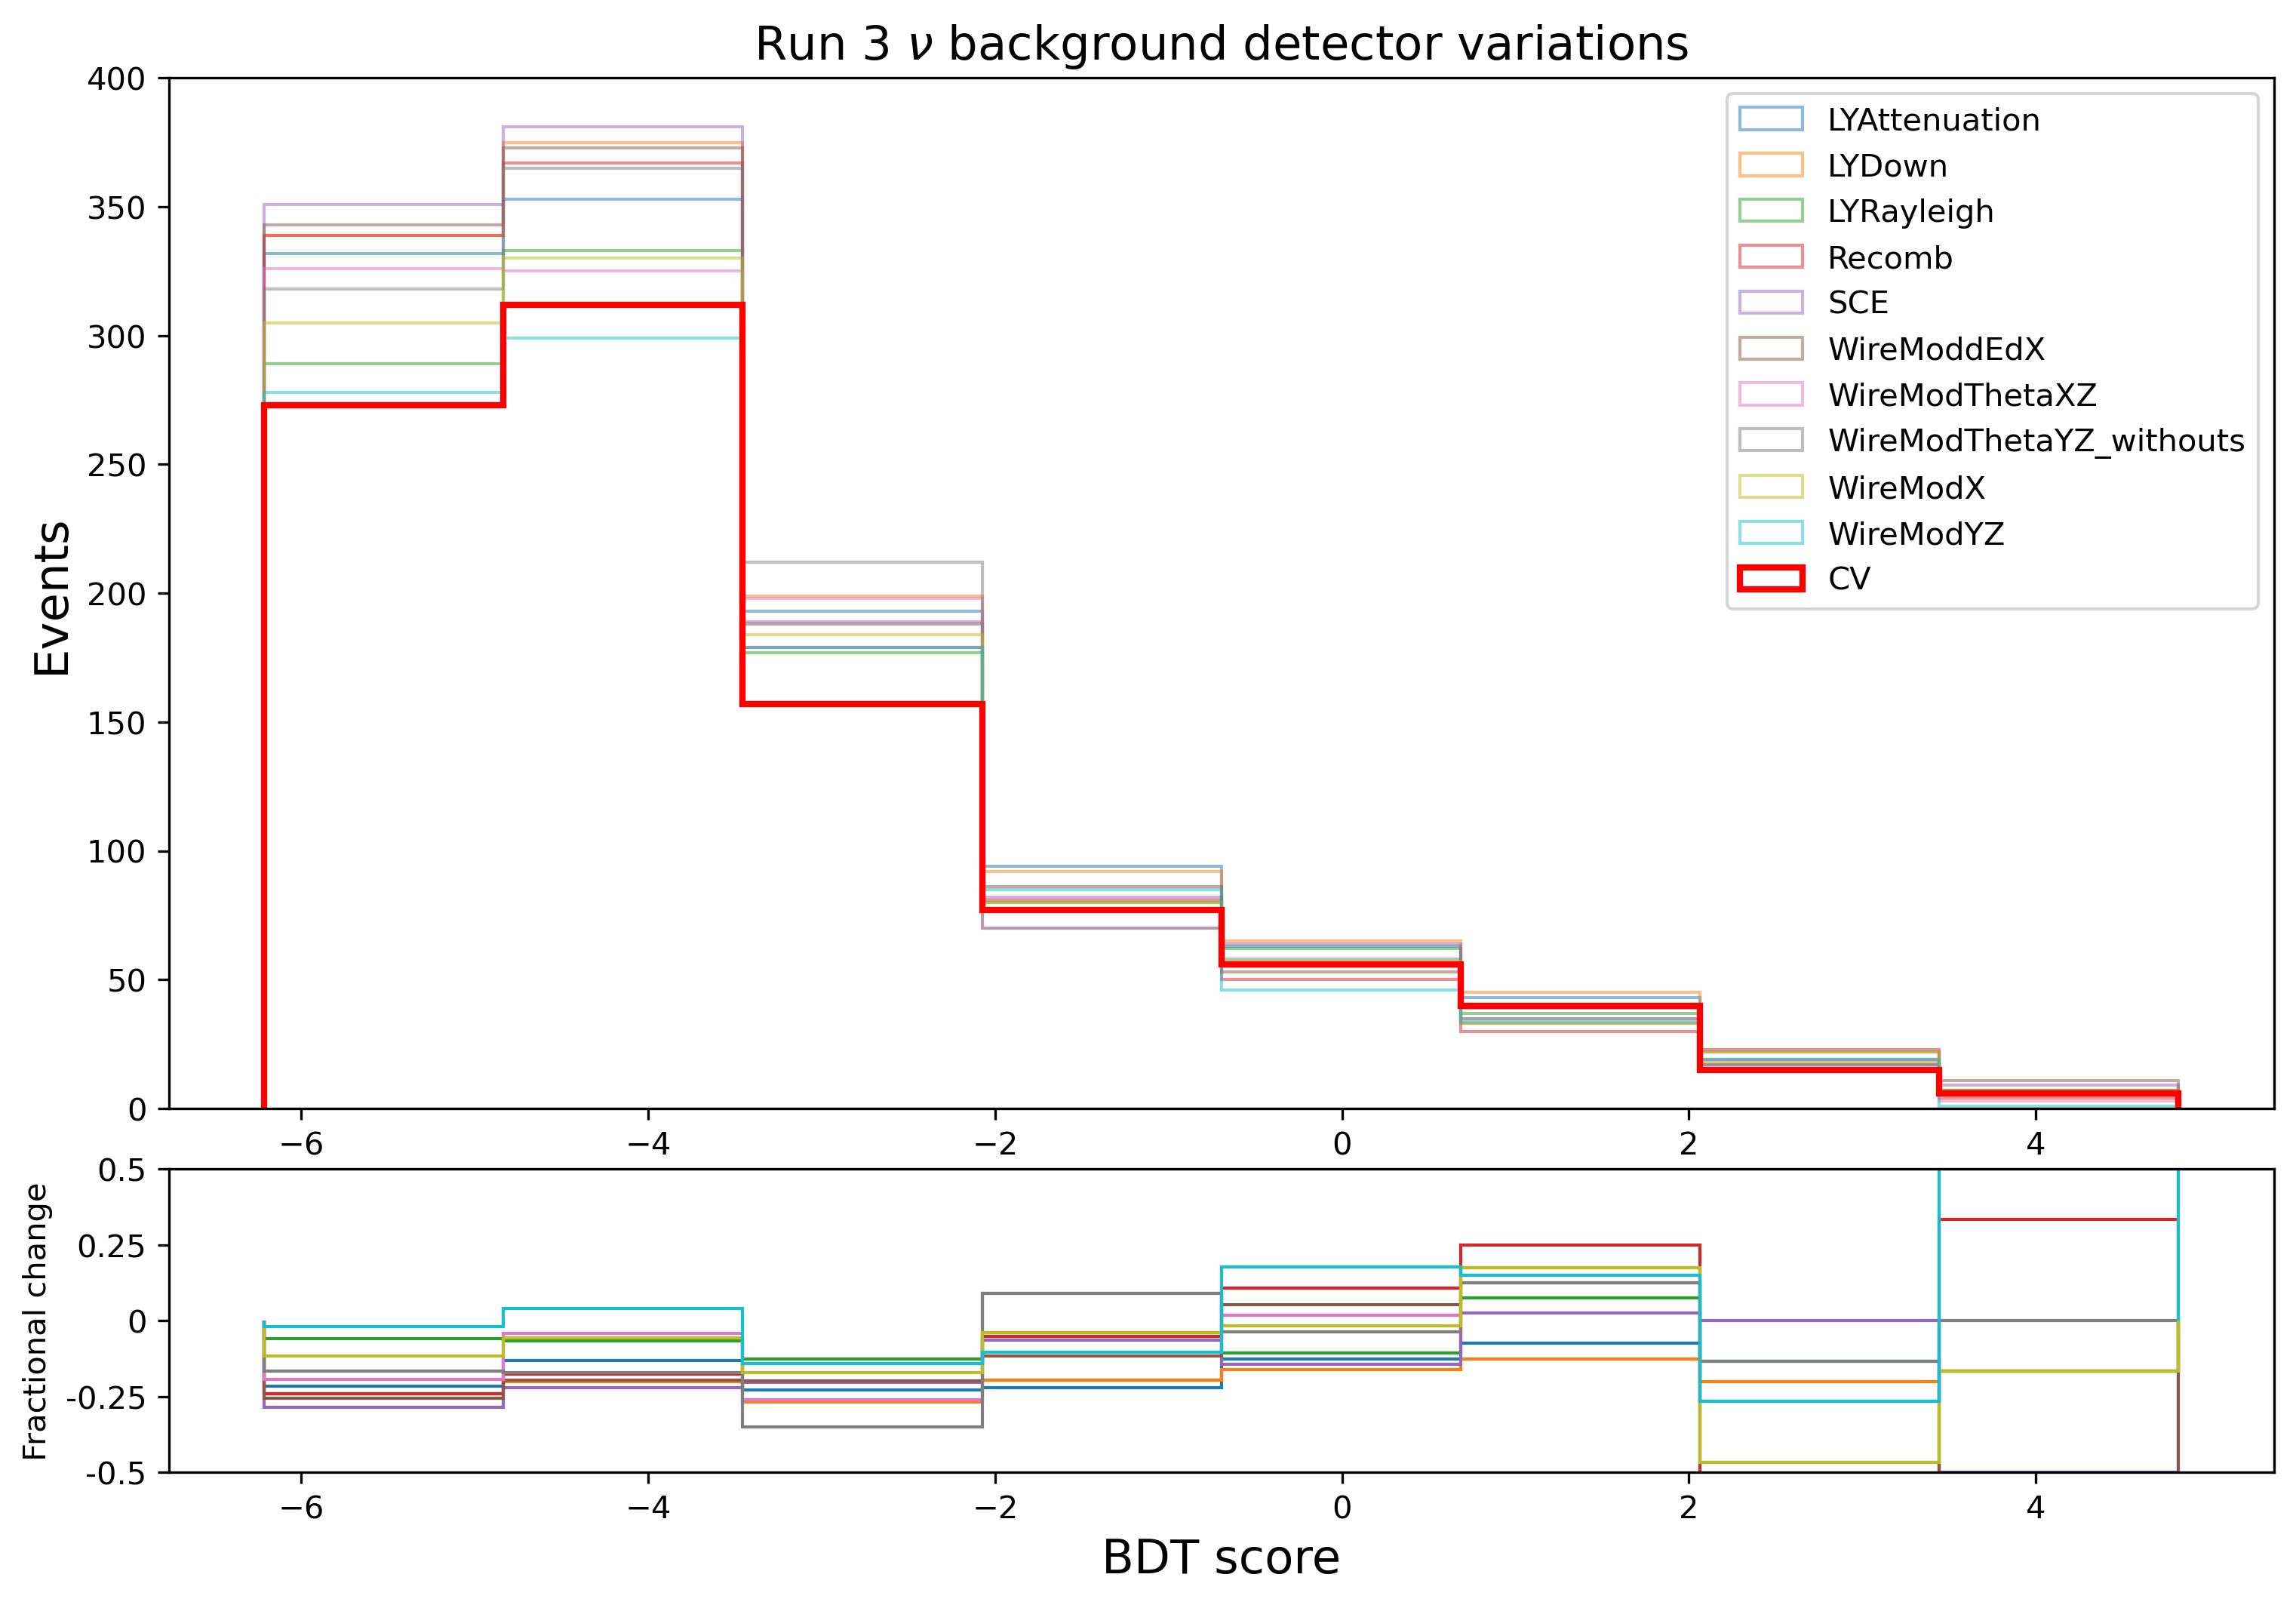

In [8]:
min_val = np.min(logit_transform(df_list[0]['bdt_score']))
max_val = np.max(logit_transform(df_list[0]['bdt_score']))

fig = plt.figure(figsize=(12, 8),dpi=300)
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.)
main_ax = fig.add_subplot(grid[:-1, :])
x_hist = fig.add_subplot(grid[-1, :], yticklabels=[-0.5,-0.25,0,0.25,0.5], sharex=main_ax)

main_ax.set_title(plot_title,size=15)
plt.xlabel('BDT score',size=15)
main_ax.set_ylabel(r'Events',size=15)
x_hist.set_ylabel('Fractional change',size=10)


(counts_cv, bins_cv) = np.histogram(logit_transform(df_list[0]['bdt_score']), bins=np.linspace(min_val,max_val,nbins))
df_list.pop(0)
count_list = 0 

error = np.zeros(nbins-1)

for df in df_list: 
    (counts, bins) = np.histogram(logit_transform(df['bdt_score']), bins=np.linspace(min_val,max_val,nbins))
    main_ax.hist(bins[:-1], bins, weights=counts,alpha=0.5, histtype='step',log=False,label=dt_variation[count_list])
    ratio = (counts_cv - counts) / counts_cv
    x_hist.hist(bins[:-1],bins,weights=ratio,histtype='step',orientation='vertical',label=str(var)) 
    error=ratio**2+error
    count_list+=1
main_ax.hist(bins_cv[:-1], bins_cv, weights=counts_cv, histtype='step',lw=2,label='CV',color='red',log=False)
main_ax.legend()
x_hist.set_ylim([-0.5,0.5])
plt.savefig(figure_path + run + "_det_var_bdt_dist.png")
plt.show()

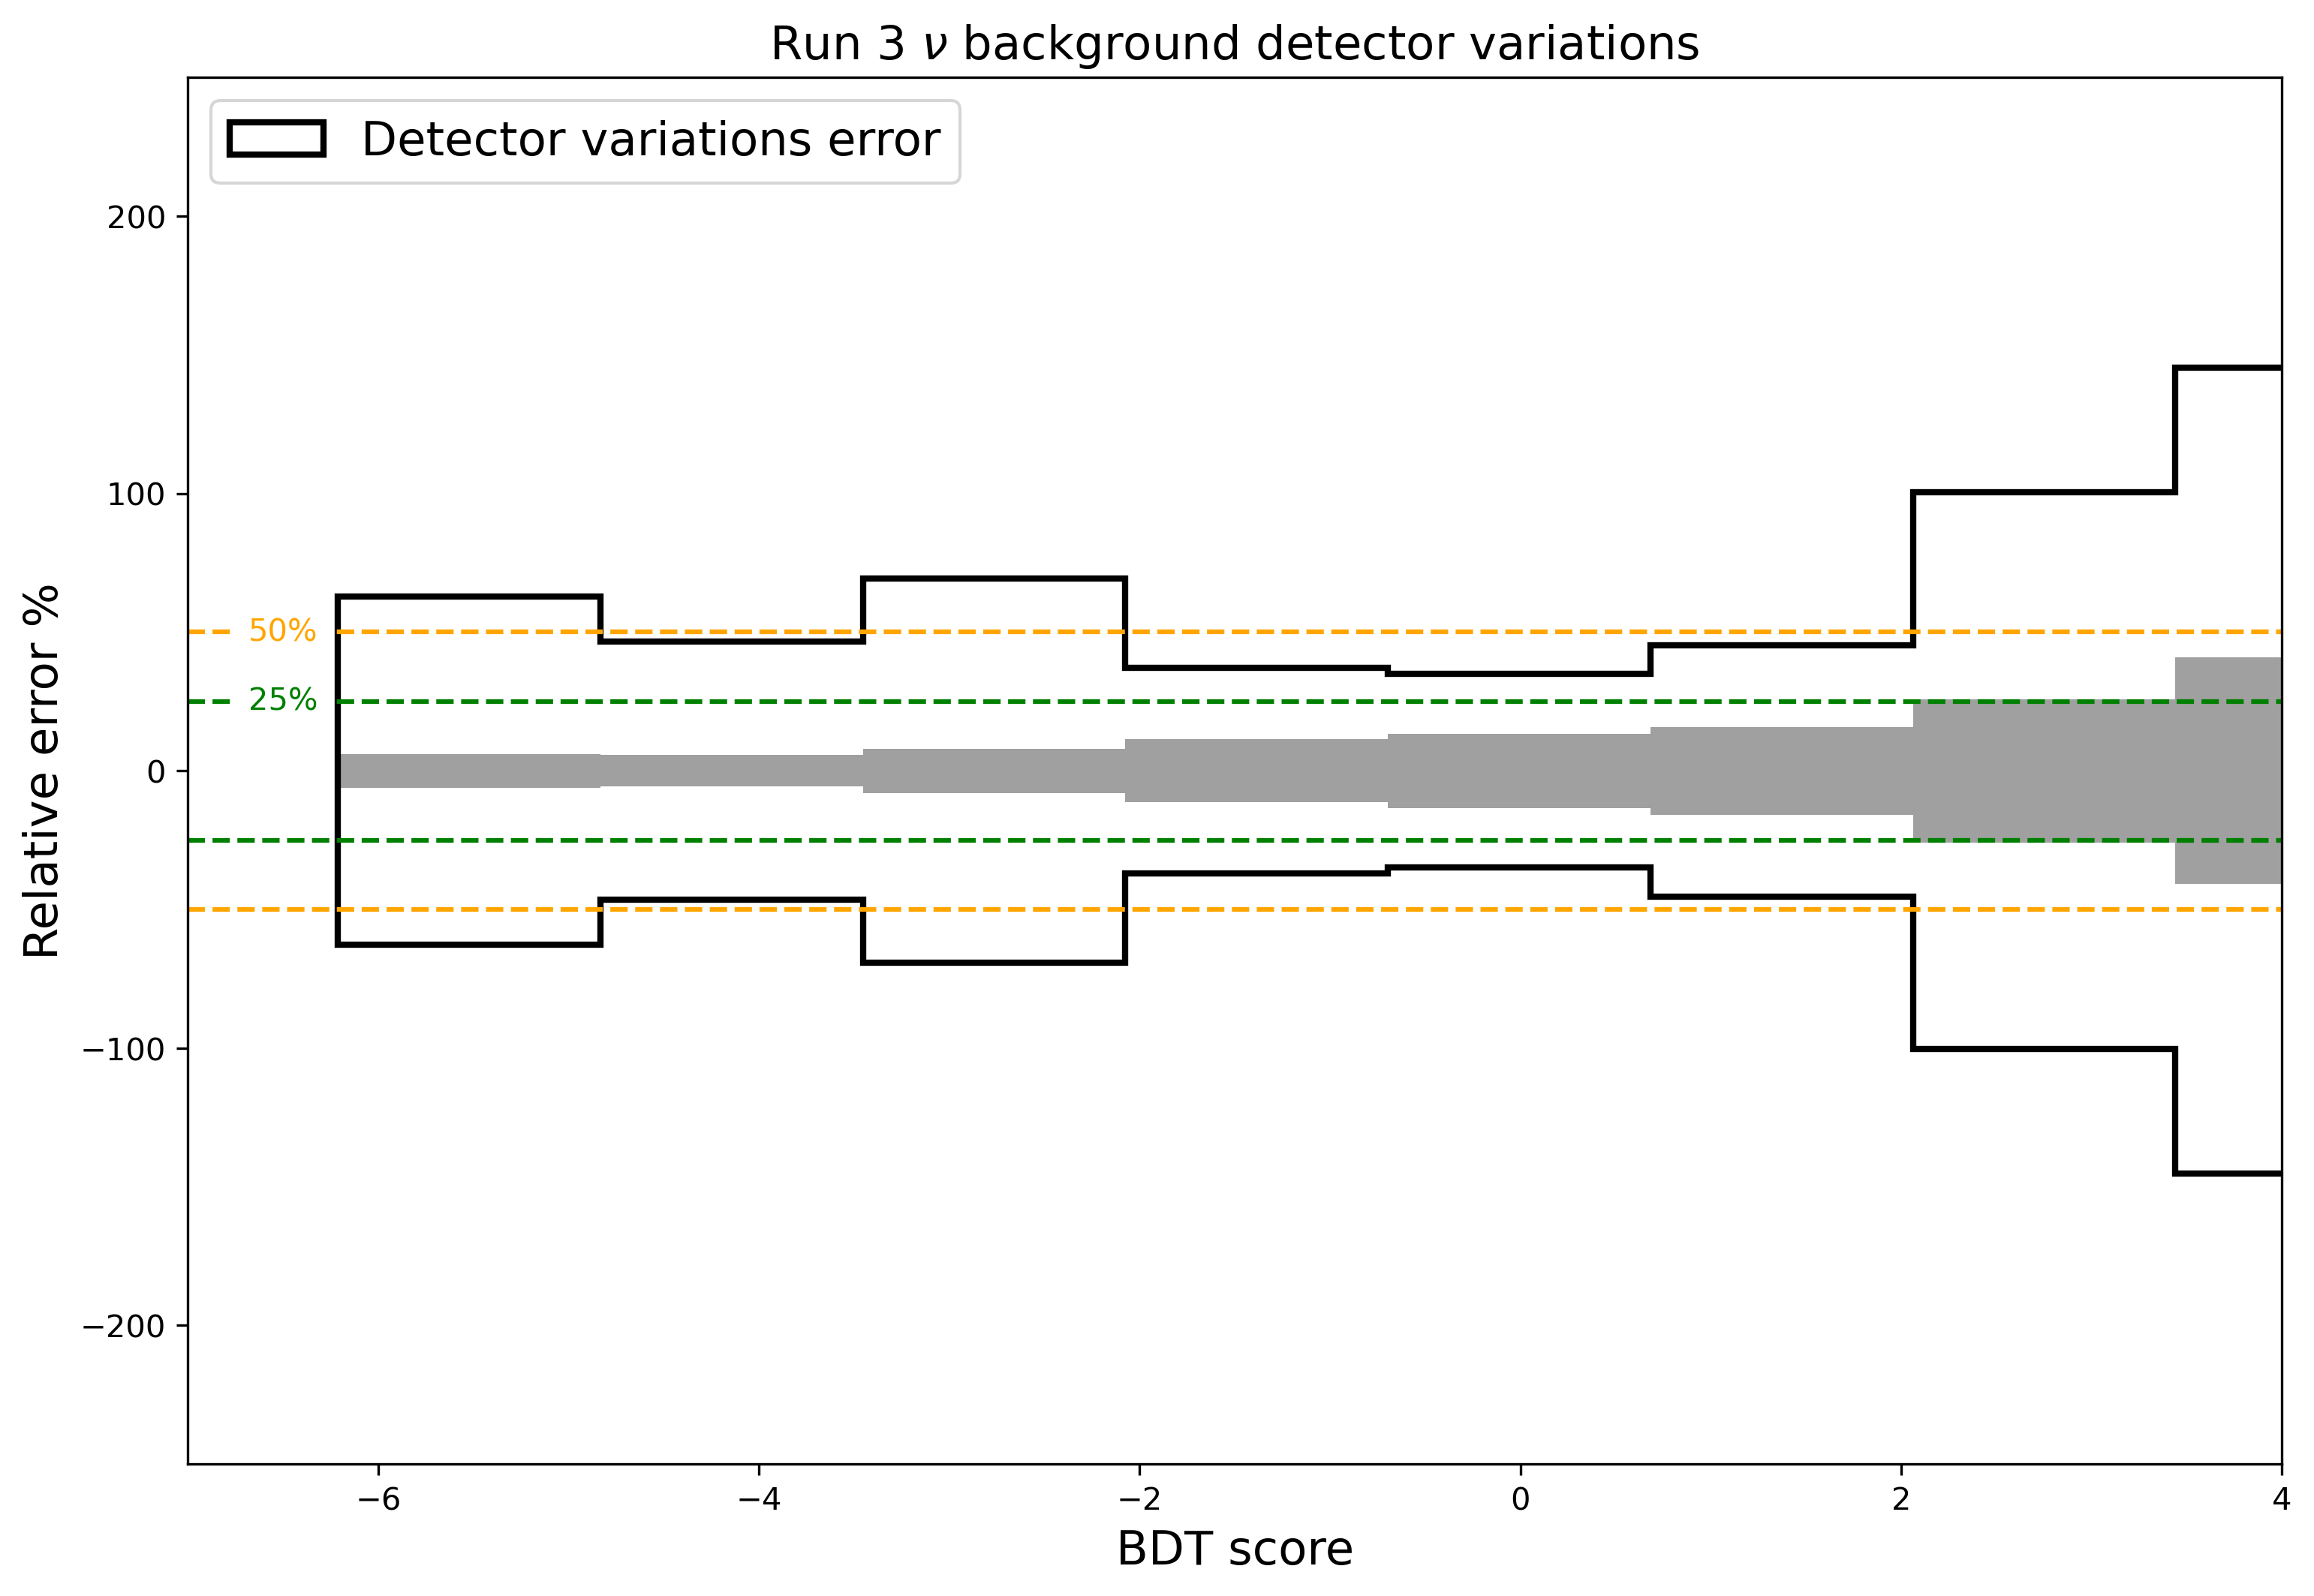

In [9]:
plt.figure(figsize=(12,8),dpi=300)
plt.xlabel('BDT score',size=15)
plt.ylabel(r'Relative error %',size=15)
plt.title(plot_title,size=15)
err=np.sqrt(error)
plt.hist(bins[:-1],bins, weights = (np.sqrt(counts_cv)/counts_cv)*100, histtype = 'stepfilled', color ='gray',alpha=0.75)
plt.hist(bins[:-1],bins, weights = -1.*(np.sqrt(counts_cv)/counts_cv)*100, histtype = 'stepfilled', color ='gray',alpha=0.75)
plt.hist(bins[:-1],bins,weights=err*100,histtype='step',color='black',label='Detector variations error',lw=2) 
plt.hist(bins[:-1],bins,weights=-err*100,histtype='step',color='black',lw=2) 
plt.hlines(25,-7,5,linestyles='dashed',color='green')
plt.text(percentage_pos,25, '25%', fontsize=10, va='center', ha='center',color='green', backgroundcolor='w')
plt.hlines(-25,-7,5,linestyles='dashed',color='green')
plt.hlines(50,-7,5,linestyles='dashed',color='orange')
plt.text(percentage_pos,50, '50%', fontsize=10, va='center', ha='center',color='orange', backgroundcolor='w')
plt.hlines(-50,-7,5,linestyles='dashed',color='orange')
plt.xlim(-7.,x_edge)
plt.ylim(-250,250)
plt.legend(fontsize=15,loc='upper left')
plt.savefig(figure_path + run + "_det_var_total_uncertainty.png")
plt.show()